In [1]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join


In [2]:
import pandas as pd
import numpy as np

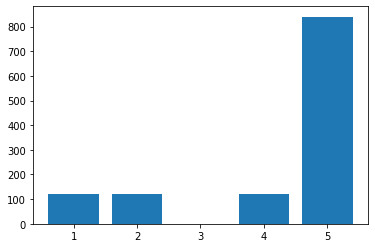

In [3]:
import matplotlib.pyplot as plt

dataset=pd.read_csv("samsungbatteryreview2.csv")
summarised_results = dataset["stars"].value_counts()
plt.bar(summarised_results.keys(), summarised_results.values)
plt.show()

In [4]:
df = pd.read_csv('samsungbatteryreview2.csv')
df.head(5)

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word
0,5,phone looks gorgeousthe build design top notch...,49,49,0,0,2,96,722,6.5
1,5,product delievery late one day issues thanks a...,151,59,0,8,2,252,1530,5.4
2,5,confusion buy go oneplus confusion sharing rev...,194,75,0,3,29,249,1535,5.6
3,1,phone overheated time also battery life mark g...,22,0,0,3,3,53,319,5.3
4,5,awesome product samsungprosvery good audio qua...,42,12,0,0,0,68,557,7.4


In [5]:
import seaborn as sns
import string
import re
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
from textblob import TextBlob

df['comment']= df['comment'].astype(str)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['polarity'] = df['comment'].apply(pol)
df['subjectivity'] = df['comment'].apply(sub)
df

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
0,5,phone looks gorgeousthe build design top notch...,49,49,0,0,2,96,722,6.5,0.353241,0.514947
1,5,product delievery late one day issues thanks a...,151,59,0,8,2,252,1530,5.4,0.215291,0.384483
2,5,confusion buy go oneplus confusion sharing rev...,194,75,0,3,29,249,1535,5.6,0.292229,0.528701
3,1,phone overheated time also battery life mark g...,22,0,0,3,3,53,319,5.3,-0.215909,0.680303
4,5,awesome product samsungprosvery good audio qua...,42,12,0,0,0,68,557,7.4,0.436364,0.559091
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,5,phone excellent battery life upto mark,5,0,0,0,0,6,38,5.5,1.000000,1.000000
1196,5,overall good phone power packed performance fe...,84,36,0,0,3,116,859,6.6,0.247302,0.538413
1197,4,hhi guysi using flagship march exact list poin...,312,78,0,6,28,321,2082,5.9,0.273986,0.569356
1198,5,camera quality awesome premium lenses better d...,29,20,0,0,2,60,402,6.4,0.253472,0.395833


In [7]:
df['polarity'] = df['polarity'].round(2)
df['subjectivity'] = df['subjectivity'].round(2)
df.sample(5)

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
432,5,confusion buy go oneplus confusion sharing rev...,194,75,0,3,29,249,1535,5.6,0.29,0.53
419,2,solves purpose terabyte internal storage must ...,47,29,0,2,7,80,492,5.7,0.02,0.39
1134,5,confusion buy go oneplus confusion sharing rev...,194,75,0,3,29,249,1535,5.6,0.29,0.53
985,5,phone excellent battery life upto mark,5,0,0,0,0,6,38,5.5,1.00,1.00
806,5,overall good phone power packed performance fe...,84,36,0,0,3,116,859,6.6,0.25,0.54


In [8]:
df2= pd.DataFrame()

In [9]:
for i in range (1,5):
  df2.loc[i,'polarity']= (df.head(100000).loc[df.stars == i].polarity.mean())
  df2.loc[i,'subjectivity']= (df.head(100000).loc[df.stars ==i].subjectivity.mean())

In [10]:
df2

,polarity,subjectivity
1,-0.22,0.68
2,0.02,0.39
3,NaN,NaN
4,0.27,0.57


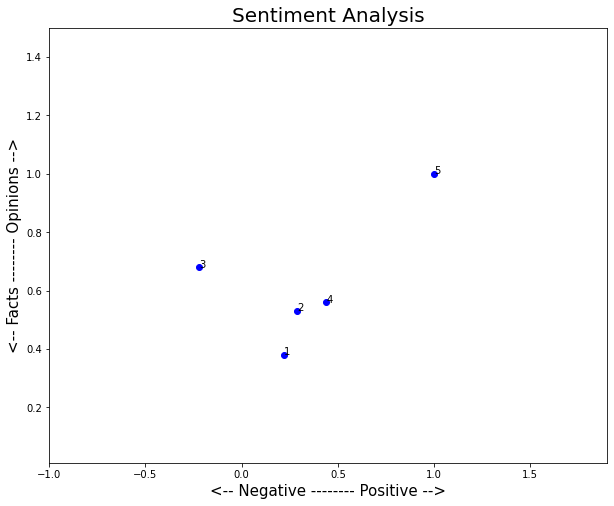

In [15]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index in range(1,6):
    x = df.polarity.loc[index]
    y = df.subjectivity.loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.0001, y+.0001, index, fontsize=10)
    plt.xlim(-1.0, 1.9) 
    plt.ylim(.01, 1.5) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [70]:
df2= df
df2['word_count']= df2['word_count'] //50*50

<AxesSubplot:xlabel='word_count'>

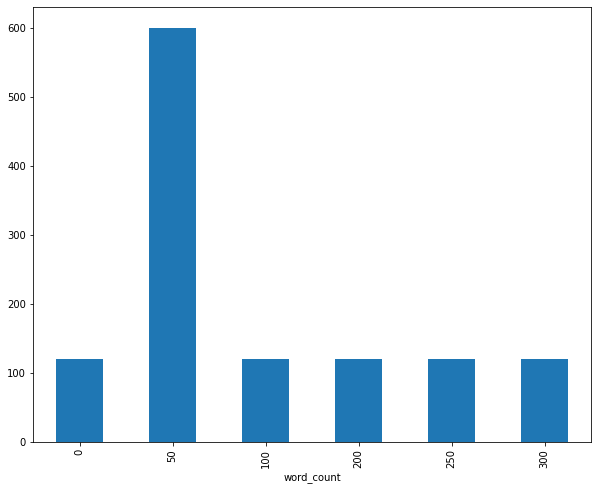

In [71]:
df.polarity.groupby(df.word_count // 50 * 50).count().plot(kind ='bar')

In [72]:
df_sub= df.loc[df.word_count //10*10]

/home/nalinjindal/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

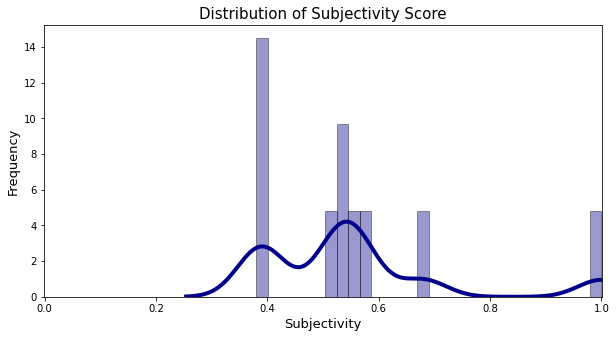

In [73]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)